# ベイズ統計

# ベイズ統計に関連する公式

## 1. ベイズの定理
ベイズの定理は、事後確率を計算するための重要な公式です。事前確率と尤度を使って、観測データが与えられた条件下での事象の確率を更新します。

$
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
$

- \( P(A | B) \)：データ \( B \) を得たときの事象 \( A \) の事後確率
- \( P(B | A) \)：事象 \( A \) が成立しているときのデータ \( B \) の尤度
- \( P(A) \)：事象 \( A \) の事前確率
- \( P(B) \)：データ \( B \) の周辺確率（全体の確率）

## 2. 周辺確率（Marginal Likelihood）
周辺確率は、あるデータ \( B \) の全体的な確率を求めるための公式です。ベイズの定理で重要な役割を果たします。

$
P(B) = P(B | A) \cdot P(A) + P(B | \neg A) \cdot P(\neg A)
$

- \( P(B) \)：データ \( B \) の周辺確率（全確率）
- \( P(B | A) \)：事象 \( A \) のもとでのデータ \( B \) の尤度
- \( P(B | \neg A) \)：事象 \( \neg A \)（事象 \( A \) の補集合）のもとでのデータ \( B \) の尤度

## 3. 事後確率（Posterior Probability）
ベイズの定理を用いて得られる、ある事象 \( A \) が与えられたデータ \( B \) に基づいて更新された確率です。

$
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
$

この公式により、事前確率 \( P(A) \) をデータ \( B \) に基づいて更新し、事後確率 \( P(A | B) \) を得ることができます。

## 4. ベイズ推定（Bayesian Estimation）
ベイズ推定は、パラメータの推定方法の一つです。データ \( D \) に基づいてパラメータ \( \theta \) の確率分布を更新します。

$
P(\theta | D) = \frac{P(D | \theta) \cdot P(\theta)}{P(D)}
$

- \( P(\theta | D) \)：データ \( D \) を観測した後のパラメータ \( \theta \) の事後分布
- \( P(D | \theta) \)：パラメータ \( \theta \) に基づくデータ \( D \) の尤度
- \( P(\theta) \)：パラメータ \( \theta \) の事前分布
- \( P(D) \)：データ \( D \) の周辺尤度

## 5. ベイズ更新（Bayesian Update）
新しい情報を得た際に、既存の確率分布を更新するプロセスです。これにより、データが得られるたびに推定値が更新されます。

$
P(A | B, C) = \frac{P(C | A, B) \cdot P(A | B)}{P(C | B)}
$

- \( P(A | B, C) \)：条件 \( B \) と \( C \) のもとでの事象 \( A \) の事後確率
- \( P(C | A, B) \)：事象 \( A \) と条件 \( B \) に基づく条件付き確率
- \( P(A | B) \)：条件 \( B \) のもとでの事象 \( A \) の事前確率

## 6. 最尤推定（Maximum Likelihood Estimation, MLE）
ベイズ推定とは異なり、最尤推定はデータから最もありそうなパラメータの値を選びます。パラメータ \( \theta \) の最尤推定値は次の式で求められます。

$
\hat{\theta} = \arg\max_{\theta} P(D | \theta)
$

- \( \hat{\theta} \)：最尤推定によって求められるパラメータの推定値
- \( P(D | \theta) \)：データ \( D \) が観測される条件下での尤度


In [59]:
# ベイズの定理を計算する関数
def bayes_theorem(P_B_given_A, P_A, P_B_given_not_A, P_not_A):
    # 周辺確率 P(B) の計算
    P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)
    
    # 事後確率 P(A|B) の計算
    P_A_given_B = (P_B_given_A * P_A) / P_B
    
    return P_A_given_B

# 例題に基づく確率
P_A = 0.01  # 病気にかかっている確率 (事前確率)
P_B_given_A = 0.95  # 病気の人が陽性になる確率 (尤度)
P_B_given_not_A = 0.05  # 健康な人が陽性になる確率 (偽陽性)
P_not_A = 1 - P_A  # 健康である確率

# ベイズの定理を使用して、陽性の結果が出たときに病気である確率を計算
P_A_given_B = bayes_theorem(P_B_given_A, P_A, P_B_given_not_A, P_not_A)

# 結果の表示
print(f"陽性結果が出たときに病気である確率: {P_A_given_B * 100:.2f}%")


陽性結果が出たときに病気である確率: 16.10%


# ベイズ回帰

線形最小二乗回帰（Ordinary Least Squares, OLS）を実装し、データと回帰直線を可視化する。

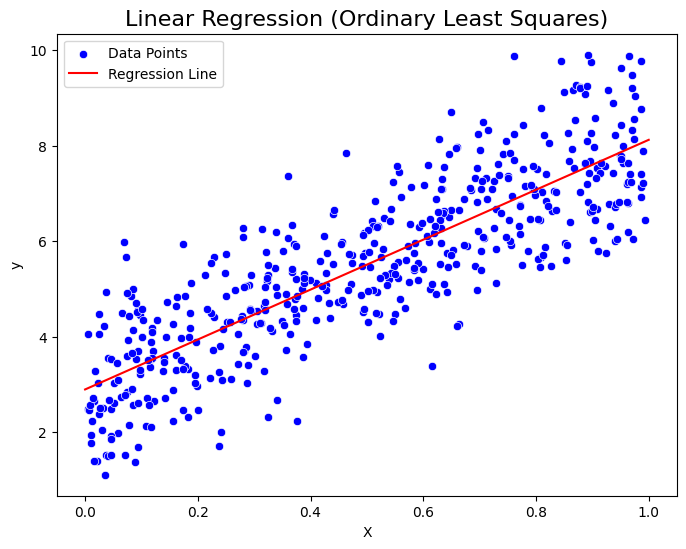

傾き (Slope): 5.230004622891446
切片 (Intercept): 2.892948353483062


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# サンプルデータの生成（ランダムな直線的な関係）
np.random.seed(42)
X = np.random.rand(500, 1)  # 100個のランダムなX値
y = 5 * X + 3 + np.random.randn(500, 1)  # y = 5*X + 3 + ノイズ

# 最小二乗法による線形回帰
# Xにバイアス項（定数項）を加える
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # [1, X]行列（定数項を加える）
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # OLSの最適解

# 回帰直線の予測
X_new = np.array([[0], [1]])  # Xの最小値と最大値で予測を行う
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # 新しいデータにバイアス項を加える
y_predict = X_new_b.dot(theta)  # 回帰直線の予測

# 可視化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='blue', label='Data Points')  # データのプロット
plt.plot(X_new, y_predict, color='red', label='Regression Line')  # 回帰直線のプロット
plt.title('Linear Regression (Ordinary Least Squares)', fontsize=16)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 回帰係数（傾きと切片）
print(f"傾き (Slope): {theta[1][0]}")
print(f"切片 (Intercept): {theta[0][0]}")


実行の流れ
サンプルデータの生成：

線形回帰モデルに従ったデータ（y = 5 * X + 3）を生成し、ノイズを加えます。
事前分布と尤度関数の定義：

log_prior関数は、回帰のパラメータ（傾き、切片、ノイズの標準偏差の対数）に対する事前分布を定義します。
log_likelihood関数は、回帰モデルの尤度を計算します。
MCMCによる事後分布の計算：

emcee.EnsembleSamplerを使用して、MCMCを実行し、回帰パラメータの事後分布をサンプリングします。
事後分布の可視化：

matplotlibとseabornを使って、パラメータ（傾き、切片、標準偏差）の事後分布をヒストグラムとして表示します。
トレースプロット：

MCMCサンプリングの各ステップごとに、パラメータの値がどのように遷移しているかを確認するためのトレースプロットを表示します。

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\20222305\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 500/500 [00:01<00:00, 250.09it/s]


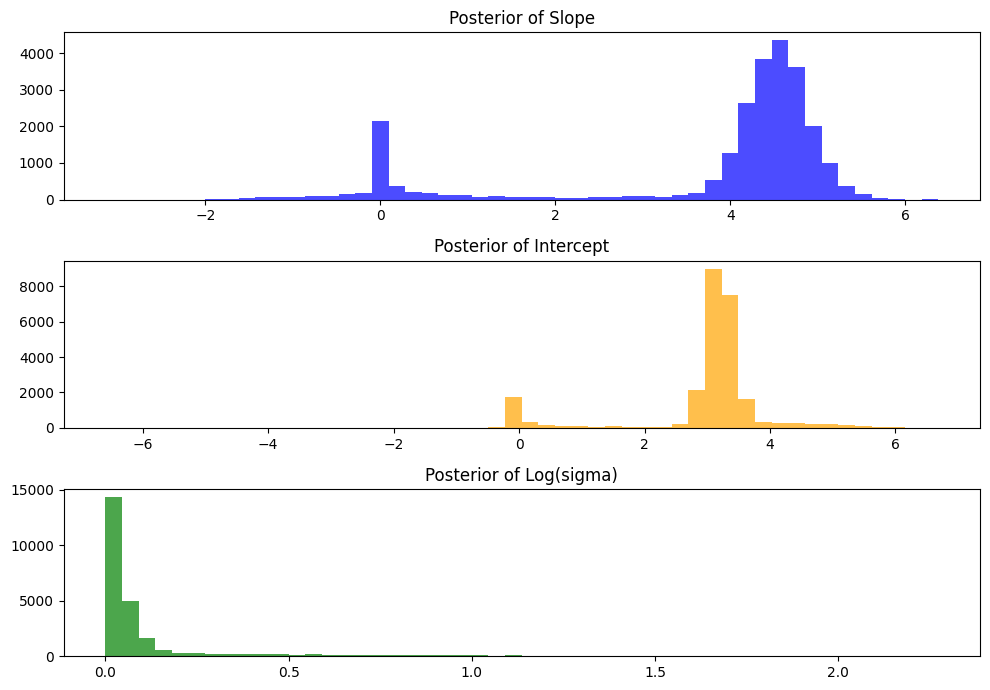

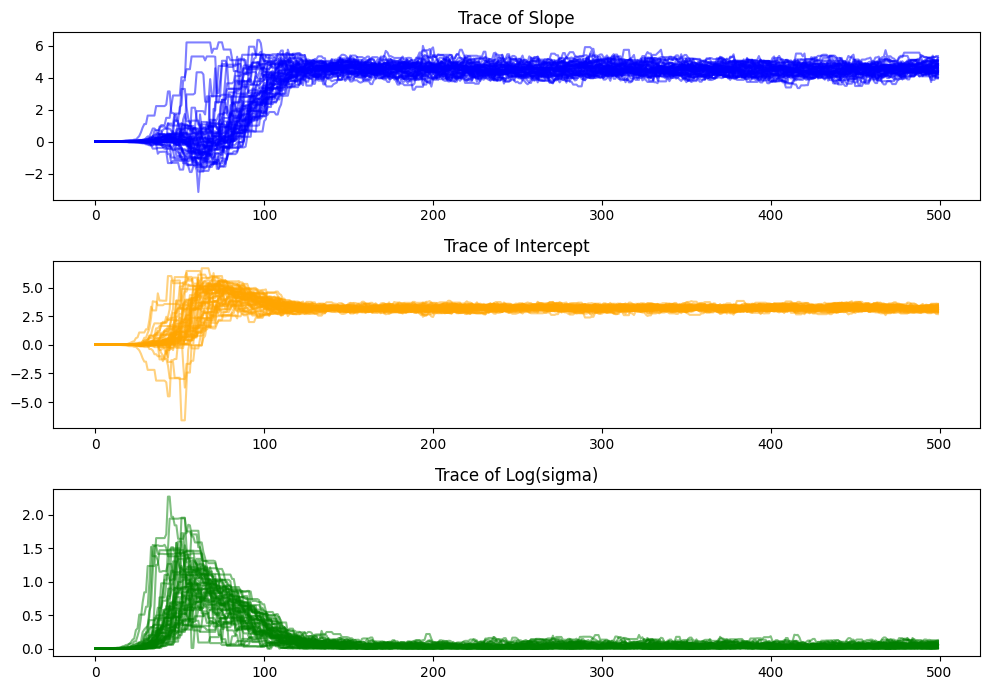

Alpha (Intercept) - Mean: 2.95, Std: 1.09
Beta (Slope) - Mean: 3.73, Std: 1.73
Sigma - Mean: 1.18, Std: 0.49


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emcee

# サンプルデータの生成（ランダムな直線的な関係）
np.random.seed(42)
X = np.random.rand(100, 1)  # 100個のランダムなX値
y = 5 * X + 3 + np.random.randn(100, 1)  # y = 5*X + 3 + ノイズ

# 事前分布の設定
def log_prior(theta):
    slope, intercept, log_sigma = theta
    if -10 < slope < 10 and -10 < intercept < 10 and 0 < log_sigma < 5:
        return 0.0
    return -np.inf

# 尤度関数の設定
def log_likelihood(theta, X, y):
    slope, intercept, log_sigma = theta
    model = slope * X + intercept
    sigma = np.exp(log_sigma)
    return -0.5 * np.sum(((y - model) / sigma)**2 + np.log(2 * np.pi * sigma**2))

# 事後分布の計算
def log_posterior(theta, X, y):
    return log_prior(theta) + log_likelihood(theta, X, y)

# 初期パラメータの設定
initial_theta = np.array([0.0, 0.0, 0.0])  # [slope, intercept, log_sigma]

# MCMCサンプリング
ndim, nwalkers = 3, 50  # パラメータ数とウォーカー数
nsteps = 500  # ステップ数
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[X, y])

# ウォーカーの初期位置をランダムに設定
p0 = initial_theta + 1e-4 * np.random.randn(nwalkers, ndim)

# MCMCサンプリングを実行
sampler.run_mcmc(p0, nsteps, progress=True)

# 結果の取得
samples = sampler.get_chain(flat=True)

# パラメータごとのヒストグラム（事後分布）
fig, axes = plt.subplots(3, figsize=(10, 7))
axes[0].hist(samples[:, 0], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Posterior of Slope')

axes[1].hist(samples[:, 1], bins=50, color='orange', alpha=0.7)
axes[1].set_title('Posterior of Intercept')

axes[2].hist(samples[:, 2], bins=50, color='green', alpha=0.7)
axes[2].set_title('Posterior of Log(sigma)')

plt.tight_layout()
plt.show()

# トレースプロット
fig, axes = plt.subplots(3, figsize=(10, 7))
axes[0].plot(sampler.get_chain()[:, :, 0], color='blue', alpha=0.5)
axes[0].set_title('Trace of Slope')

axes[1].plot(sampler.get_chain()[:, :, 1], color='orange', alpha=0.5)
axes[1].set_title('Trace of Intercept')

axes[2].plot(sampler.get_chain()[:, :, 2], color='green', alpha=0.5)
axes[2].set_title('Trace of Log(sigma)')

plt.tight_layout()
plt.show()

# 統計情報の表示
alpha_samples = samples[:, 1]  # 切片
beta_samples = samples[:, 0]   # 傾き
sigma_samples = np.exp(samples[:, 2])  # ノイズの標準偏差（対数を取った後に逆変換）

print(f"Alpha (Intercept) - Mean: {np.mean(alpha_samples):.2f}, Std: {np.std(alpha_samples):.2f}")
print(f"Beta (Slope) - Mean: {np.mean(beta_samples):.2f}, Std: {np.std(beta_samples):.2f}")
print(f"Sigma - Mean: {np.mean(sigma_samples):.2f}, Std: {np.std(sigma_samples):.2f}")


上記の手順で、アルファ（切片）、ベータ（傾き）、およびシグマ（ノイズの標準偏差）の事後分布を可視化し、その統計情報も表示できます。

アルファとベータを用いて、もとの回帰直線との比較を行う。

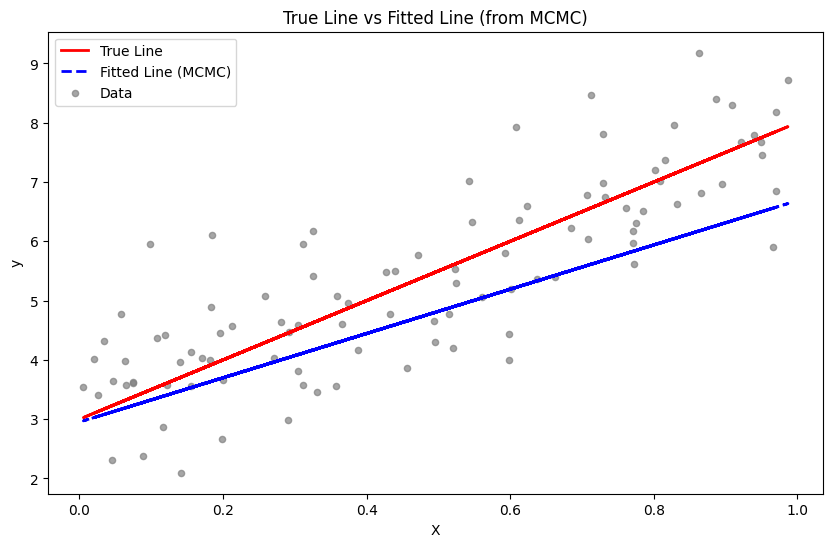

In [62]:

# 元の回帰直線とMCMCで得られた回帰直線を表示
plt.figure(figsize=(10, 6))

# 元の回帰直線
plt.plot(X, 5 * X + 3, label="True Line", color="red", linewidth=2)

# 回帰直線（事後分布から得た平均のalphaとbetaを使用）
alpha_mean = np.mean(alpha_samples)
beta_mean = np.mean(beta_samples)
y_pred = beta_mean * X + alpha_mean
plt.plot(X, y_pred, label="Fitted Line (MCMC)", color="blue", linestyle="--", linewidth=2)

# 散布図（データポイント）
plt.scatter(X, y, alpha=0.7, label="Data", color="gray", s=20)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True Line vs Fitted Line (from MCMC)")
plt.show()

結果：

赤い直線（True Line）が元の回帰直線を示し、青い破線（Fitted Line (MCMC)）がMCMCを使って求めた回帰直線です。
これにより、MCMCによって得られた回帰直線が、元の回帰直線にどれくらい近いかを視覚的に確認できます。

上記までで、ダミーのデータを用いてベイズ回帰を試すことができたので、次は実際に金融データを用いて行う。

例として2つのETF（GLDとGDX）の時系列データを用いる。

In [63]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pandas as pd

# 1. ETFデータを取得
tickers = ['GLD', 'GDX']
start_date = '2015-01-01'
end_date = '2022-12-31'

# 2つのETFデータを取得
raw = yf.download(tickers, start=start_date, end=end_date)['Close']

data = raw[['GLD', 'GDX']].dropna()

# データ確認
data.head()



[*********************100%***********************]  2 of 2 completed


Ticker,GLD,GDX
Date,,
2015-01-02,114.080002,17.153215
2015-01-05,115.800003,17.606045
2015-01-06,117.120003,18.538874
2015-01-07,116.430000,18.194725
2015-01-08,115.940002,17.923023


In [64]:
data = data / data.iloc[0]
# データを開始値1に正規化

# データ確認
data.head()

Ticker,GLD,GDX
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,1.015077,1.026399
2015-01-06,1.026648,1.080781
2015-01-07,1.020600,1.060718
2015-01-08,1.016304,1.044878


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     2014 non-null   float64
 1   GDX     2014 non-null   float64
dtypes: float64(2)
memory usage: 47.2 KB


# 相対パフォーマンス評価
相対パフォーマンス評価とは、複数の銘柄（例えば、ETF）のパフォーマンスを比較する方法です。これにより、各銘柄のパフォーマンスが他の銘柄に対してどれほど良いかを評価できます。

1. リターンの計算：

各ETFのリターンを対数リターンで計算します。対数リターンは、価格の変化を比率として捉える方法です。

2. 累積リターンの計算：

(1 + 日次リターン) を累積積算することで、各ETFの累積リターンを計算します。

3. 累積リターンのプロット：

GLDとGDXの累積リターンを同時にプロットして、各ETFのパフォーマンスを比較します。

4. 年率化リターンと年率化リスクの計算：

年率化リターン（mean * 252）と年率化リスク（標準偏差を√252倍）を計算し、パフォーマンス指標を求めます。

5. シャープレシオの計算：

シャープレシオは、リスク調整後のリターンを評価するための指標で、次のように計算されます：
Sharpe Ratio= 年率化リスク/(年率化リターン−リスクフリー金利)

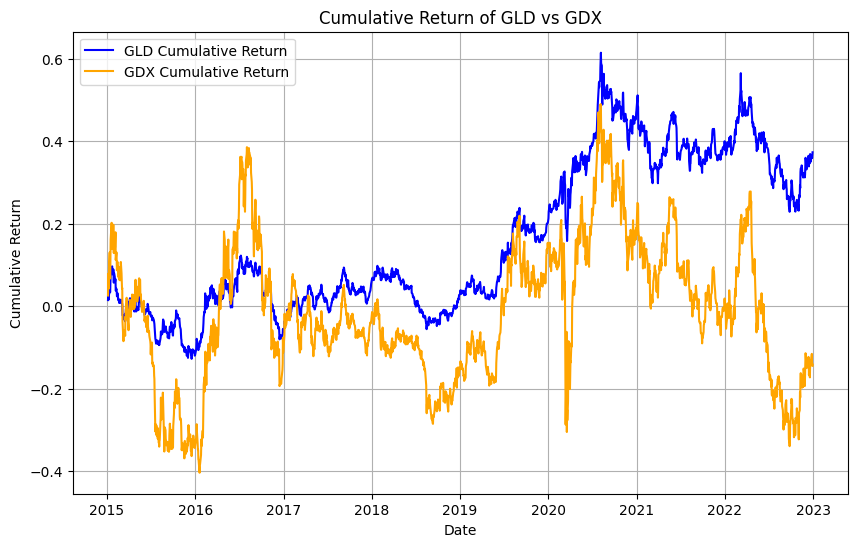

In [66]:
# 各ETFのリターンを計算
rets = np.log(data / data.shift(1)).dropna()

# 累積リターンを計算
cumulative_rets = (1 + rets).cumprod() - 1

# パフォーマンス評価: 累積リターンをプロット
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rets['GLD'], label='GLD Cumulative Return', color='blue')
plt.plot(cumulative_rets['GDX'], label='GDX Cumulative Return', color='orange')

plt.title('Cumulative Return of GLD vs GDX')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# 累積リターンのプロットにより、GLDとGDXのパフォーマンスを視覚的に比較できます。


In [67]:

# 年率化リターンと年率化リスクを計算
annualized_return = rets.mean() * 252
annualized_volatility = rets.std() * np.sqrt(252)

# 結果表示
performance = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility
})

print(performance)

# シャープレシオの計算（リスク調整後のパフォーマンス評価）
risk_free_rate = 0.02  # リスクフリー金利（例：2%）
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

performance['Sharpe Ratio'] = sharpe_ratio
print(performance)

        Annualized Return  Annualized Volatility
Ticker                                          
GLD              0.049671               0.140999
GDX              0.060760               0.398303
        Annualized Return  Annualized Volatility  Sharpe Ratio
Ticker                                                        
GLD              0.049671               0.140999      0.210436
GDX              0.060760               0.398303      0.102335


上記の結果から、GDXの年率化リターンはGLDよりも高いですが、リスク（ボラティリティ）も高いことがわかります。また、シャープレシオを見ても、GDXの方がリスク調整後のリターンが高いと評価できます。

In [68]:
data.corr()
# 2つの商品の相関の計算

Ticker,GLD,GDX
Ticker,,
GLD,1.00000,0.93219
GDX,0.93219,1.00000


次に、散布図でデータ点の日付を可視化する。

データフレームのdetatimeIndexオブジェクトをmatplotlibの日付に変換し、GLD値をGDX値に対してプロットし、各データ対の日付を様々な色で表す時系列データの散布図にする。

In [69]:
from pylab import mpl

data.index[:3]


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [70]:

mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())

mpl_dates[:3]

array([16437., 16440., 16441.])

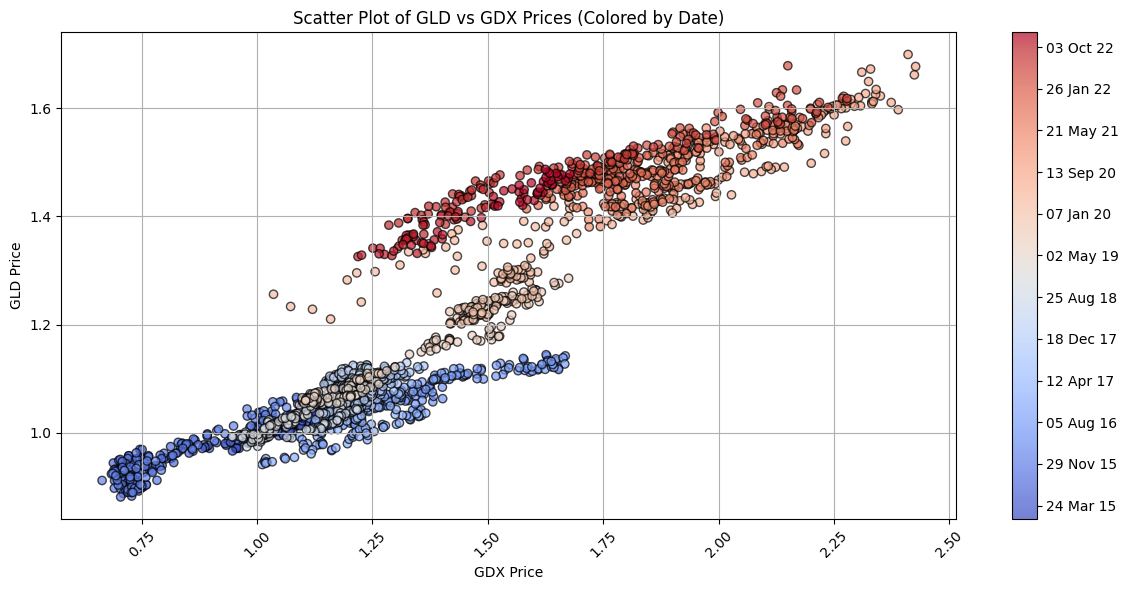

In [71]:

# 2. 日付インデックスの確認
data.index = pd.to_datetime(data.index)

# 3. GLDとGDXの価格をプロット
plt.figure(figsize=(12, 6))

# 時系列データの日付を色としてプロット
scatter = plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, cmap='coolwarm', alpha=0.7, edgecolors='k')

# カラーバー（色が日付を示す）
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))

# グラフのタイトルとラベル
plt.title('Scatter Plot of GLD vs GDX Prices (Colored by Date)')
plt.xlabel('GDX Price')
plt.ylabel('GLD Price')


# 日付のフォーマット設定 (x軸とy軸の範囲を調整)
plt.xticks(rotation=45)
plt.tight_layout()

# グリッドを表示
plt.grid(True)

# プロットの表示
plt.show()

# GDX価格に対するGDL価格の散布図

次のコードは、GDXとGDLの時系列に基づくベイズ回帰を実装する。

事前確率分布に対する仮定によるMCMCサンプリングをする

                            OLS Regression Results                            
Dep. Variable:                    GLD   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:46:30   Log-Likelihood:                 2275.3
No. Observations:                2014   AIC:                            -4547.
Df Residuals:                    2012   BIC:                            -4535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4777      0.007     72.605      0.0

C:\Users\20222305\AppData\Local\Temp\ipykernel_5564\1646404758.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_post = results.params[0]
C:\Users\20222305\AppData\Local\Temp\ipykernel_5564\1646404758.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_post = results.params[1]


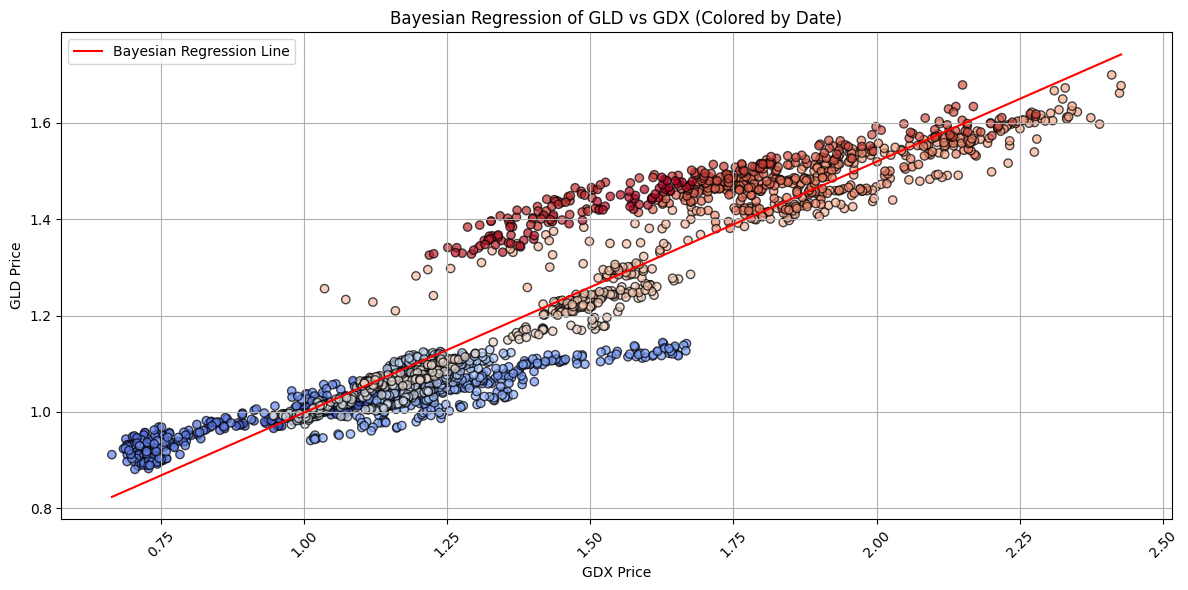

In [72]:
# 4. ベイズ回帰 (GDX価格に対するGLD価格)
# X = GDX（説明変数）に定数項（切片）を追加
X = sm.add_constant(data['GDX'])

# statsmodelsを用いて線形回帰モデルをフィット
model = sm.OLS(data['GLD'], X)
results = model.fit()

# 回帰結果の表示
print(results.summary())

# 5. 回帰直線の計算
alpha_post = results.params[0]
beta_post = results.params[1]

# 回帰直線の計算
gdx_vals = np.linspace(data['GDX'].min(), data['GDX'].max(), 100)
gld_vals_pred = alpha_post + beta_post * gdx_vals

# 散布図と回帰直線を同時にプロット
plt.figure(figsize=(12, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.plot(gdx_vals, gld_vals_pred, color='red', label='Bayesian Regression Line')

# グラフのタイトルとラベル
plt.title('Bayesian Regression of GLD vs GDX (Colored by Date)')
plt.xlabel('GDX Price')
plt.ylabel('GLD Price')
plt.legend()

# 日付のフォーマット設定
plt.xticks(rotation=45)
plt.tight_layout()

# グリッドを表示
plt.grid(True)

# プロットの表示
plt.show()


## 説明

データの取得：

yfinanceライブラリを用いて、GLDとGDXの価格データを取得します。
日付インデックスの確認：

データの日付インデックスをpd.to_datetime()で変換し、matplotlibの散布図に日付を色分けして表示します。
ベイズ回帰の代わりに線形回帰：

statsmodelsのOLS（最小二乗法）を使用して、GDXに基づくGLDの回帰を行います。事前分布を使用せずに、最小二乗法に基づく回帰直線を求めます。
sm.add_constant(data['GDX'])でGDXに定数項（切片）を追加しています。
回帰直線の計算：

最適化された回帰係数（alpha_postとbeta_post）を使って回帰直線を計算し、散布図に追加します。
結果の表示：

回帰結果（回帰係数、p値、R²など）を表示します。
plt.scatter()で散布図を描き、plt.plot()で回帰直線を重ねて描画します。

## 結果

このコードでは、statsmodelsを使用して、最小二乗法による線形回帰モデルを適用しています。ベイズ回帰とは異なり、MCMCサンプリングや事前分布は使用していませんが、回帰直線を求めて散布図に表示することができます。

## 問題点

上記の図は、回帰方法における重大な欠点を示している。この方式では時間の経過に伴う進化を反映できておらず、最新のデータが最古のデータと同じように扱われてしまっています。

# 時間の経過に伴う推定更新

ファイナンスでのベイズ方式は「通時的解釈」が最も役立つ
これはつまり、「時間経過後の新データが、更新や学習によりより良い回帰や推定をもたらす」というもの。

この概念を取り込むには回帰パラメータがある分布でランダムになるだけでなく、その経過に伴いランダムウォークを行うと仮定することが大切。

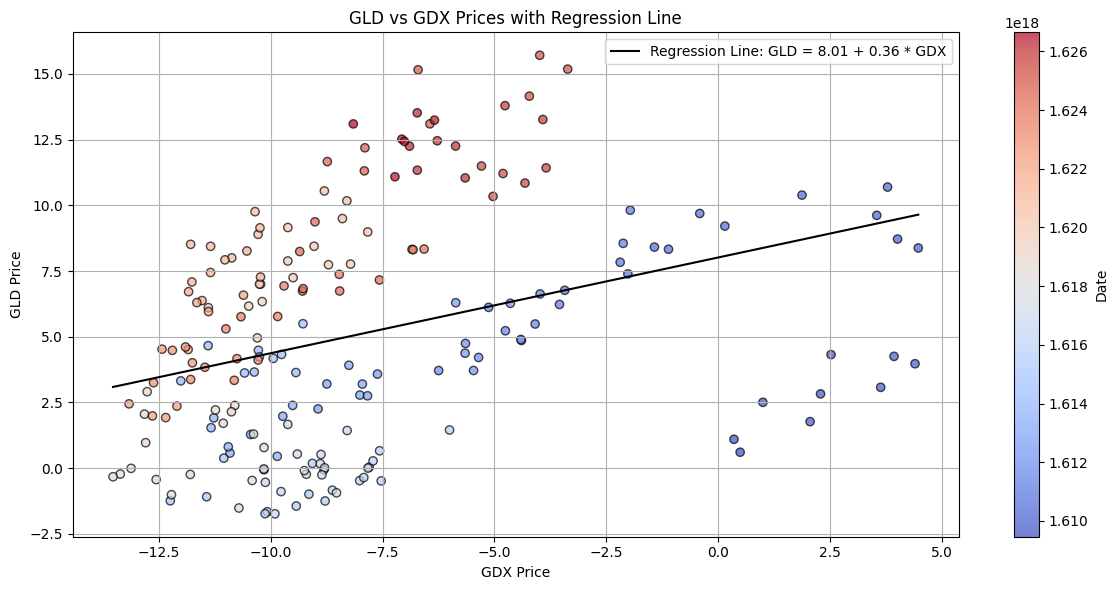

In [ ]:
# ランダムウォークではないダミーデータの生成

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# ダミーデータの生成（実際のデータを使用する場合はここで置き換えてください）
# ここではGLDとGDXの時系列データをランダムに生成
np.random.seed(42)
dates = pd.date_range('2021-01-01', periods=200, freq='D')
GDX = np.random.randn(200).cumsum()  # GDX価格のシミュレーション
GLD = 0.5 * GDX + np.random.randn(200).cumsum()  # GLD価格（GDXに基づく）

# データフレームの作成
data = pd.DataFrame({'Date': dates, 'GDX': GDX, 'GLD': GLD})
data.set_index('Date', inplace=True)

# 線形回帰（アルファとベータ）の推定
X = data['GDX'].values.reshape(-1, 1)  # 説明変数（GDX）
y = data['GLD'].values  # 目的変数（GLD）

# 最小二乗法による回帰分析
model = LinearRegression()
model.fit(X, y)

# 回帰直線の傾き（ベータ）と切片（アルファ）
alpha = model.intercept_
beta = model.coef_[0]

# 回帰線を描画するための値を作成
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = alpha + beta * X_range

# 散布図を描画
plt.figure(figsize=(12, 6))
plt.scatter(data['GDX'], data['GLD'], c=data.index, cmap='coolwarm', alpha=0.7, edgecolors='k')

# 回帰線の描画
plt.plot(X_range, y_pred, color='black', label=f'Regression Line: GLD = {alpha:.2f} + {beta:.2f} * GDX')

# カラーバー（色が日付を示す）
plt.colorbar(label='Date')

# タイトルとラベル
plt.title('GLD vs GDX Prices with Regression Line')
plt.xlabel('GDX Price')
plt.ylabel('GLD Price')

# グリッドとレイアウト
plt.grid(True)
plt.tight_layout()

# 回帰直線の説明を追加
plt.legend()

# プロットの表示
plt.show()


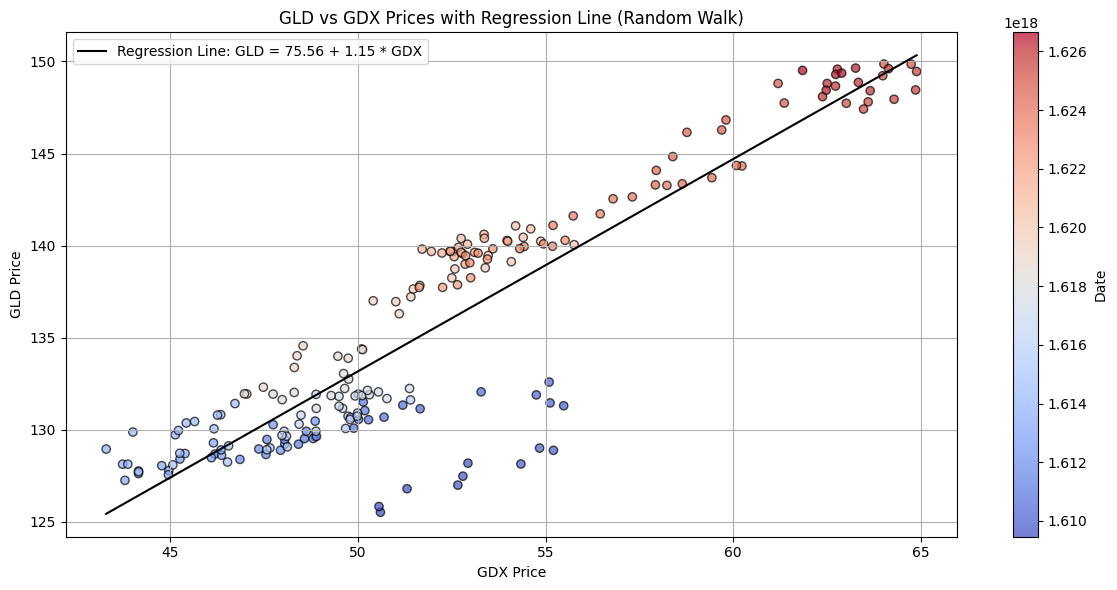

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# シード設定（再現性のため）
np.random.seed(42)

# 日付データを作成
dates = pd.date_range('2021-01-01', periods=200, freq='D')

# ランダムウォークの生成
def random_walk(n, start=100, drift=0, volatility=1):
    """n個のランダムウォークデータを生成"""
    steps = np.random.randn(n) * volatility + drift  # ランダムな変動 + ドリフト
    return start + np.cumsum(steps)  # 初期値 + 累積和でランダムウォーク

# GDXとGLDの価格をランダムウォークで生成
GDX = random_walk(200, start=50, drift=0.1, volatility=1)  # ドリフト0.1、ボラティリティ1
GLD = 0.5 * GDX + random_walk(200, start=100, drift=0.05, volatility=0.5)  # GDXと相関を持たせる

# データフレーム作成
data = pd.DataFrame({'Date': dates, 'GDX': GDX, 'GLD': GLD})
data.set_index('Date', inplace=True)

# 線形回帰
X = data['GDX'].values.reshape(-1, 1)
y = data['GLD'].values
model = LinearRegression()
model.fit(X, y)

# 回帰直線の計算
alpha = model.intercept_
beta = model.coef_[0]

# 回帰直線の予測値
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = alpha + beta * X_range

# 散布図のプロット（色を日付で表現）
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data['GDX'], data['GLD'], c=data.index, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.plot(X_range, y_pred, color='black', label=f'Regression Line: GLD = {alpha:.2f} + {beta:.2f} * GDX')

# カラーバー（色が日付を示す）
plt.colorbar(label='Date')

# グラフのタイトルとラベル
plt.title('GLD vs GDX Prices with Regression Line (Random Walk)')
plt.xlabel('GDX Price')
plt.ylabel('GLD Price')

# グリッド・凡例
plt.grid(True)
plt.legend()
plt.tight_layout()

# プロットの表示
plt.show()


Q：ベイズ回帰について「時間の経過に伴う推定更新」を行おうとするとランダムウォークを使用しなければならず、ランダムウォークは実データを使っていないため現実のデータを反映していないということか？

---

ほぼその通りですが、少し整理すると次のようになります。

💡 「時間の経過に伴う推定更新」を行うためにランダムウォークを使うのは手法の1つだが、現実のデータを直接反映していないため、そのままでは実データとは異なる可能性がある。

1. なぜ時間の経過とともに推定更新をしたいのか？
金融データは 時系列データ なので、
「新しいデータが入るたびに、過去の情報を考慮しながら推定を更新したい」というニーズがある。
これを **逐次ベイズ推定（Sequential Bayesian Inference）** と呼ぶこともある。

例えば：

ある時点でのGLDとGDXの回帰関係 を求める
新しいデータが来たら、その情報を加味して回帰直線を修正する
時間とともにモデルのパラメータが変化する
2. ここでランダムウォークが出てくる理由
「パラメータ（α, β）が時間とともに変化する」と考えると、
その変化の仕方をどうモデリングするかが問題になる。

💡 代表的な方法の1つが「ランダムウォーク」を仮定すること。

例えば、回帰係数 β（傾き）が徐々に変化する と考えると：

$
\beta _{t} = \beta _{t + 1} + \epsilon _{t}
$
​
という形にする（ランダムウォーク）。
これは 「直前の値をベースにして少しずつ変動する」 という性質を持っており、金融データのパラメータ推定に使われることがある。
このように、「時間の経過に伴う推定更新」を行うための手段としてランダムウォークが使われることが多い。

3. しかし、ランダムウォークの問題点

ランダムウォークは、過去のパラメータに「小さなランダム変動」を足すだけ なので、
実際の市場のダイナミクス（例：景気サイクル、ボラティリティ変化、相関の変化）を捉えていない。

市場のトレンド（例：リーマンショック、コロナショック）を再現できない。
実際のGLDとGDXの相関の変化を考慮していない。
マーケットの「ジャンプ」や「突発的な変動」を考慮しない。
つまり、ランダムウォークを使うと **「α, βが時間とともに変化するモデル」は作れるが、その変化の仕方が現実と一致する保証はない。**

4. より実際のデータに近づけるには？

✅ 実際の金融データを用いた「動的線形回帰モデル（Dynamic Linear Model, DLM）」を作る
（DLMは状態空間モデルの一種で、α, βの変化をもっと柔軟に表現できる）

✅ 状態空間モデルを使う

例えば、カルマンフィルタ（Kalman Filter）を使うと、「ランダムウォークよりも市場データの動きに適応的な推定」ができる。
これは 金融時系列モデル（時変係数回帰） でよく使われる手法。
GARCHモデル を組み込むと、ボラティリティの変動を加味できる。

✅ ベイズフィルタの適用

カルマンフィルタのような手法を、ベイズ回帰の文脈で使うことも可能（「時変ベイズ回帰」）。

---

### まとめ

- ✔ 時間とともに推定を更新するには、ランダムウォークを使うことが多い（α, βが変化するから）。
- ✔ しかし、ランダムウォークは 現実の金融市場の動きを正確に反映していない ことが問題になる。
- ✔ そこで、状態空間モデル・カルマンフィルタ・GARCHモデル などを組み合わせると、より現実に近いベイズ回帰ができる。

もし 「金融データの動的ベイズ回帰を現実的に行いたい」 なら、ランダムウォークにこだわらず、状態空間モデル での推定を考えると良いかもしれません 🚀

# $+\alpha$ : 逐次ベイズ推定のコード

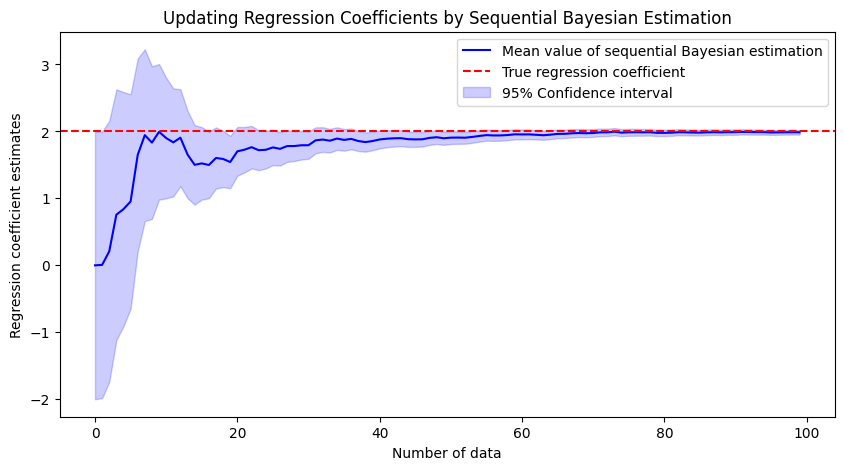

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 初期の事前分布（例：回帰係数の平均0、分散1）
mu_prior = 0      # 事前分布の平均
sigma_prior = 1   # 事前分布の標準偏差

# 2. データ（例えば、GDXとGLDの関係）
np.random.seed(42)
X = np.linspace(0, 10, 100)  # GDXの価格
true_beta = 2.0              # 実際の傾き（仮定）
Y = true_beta * X + np.random.normal(0, 1, size=len(X))  # GLDの価格（ノイズ付き）

# 3. 逐次ベイズ推定
mu_post = mu_prior
sigma_post = sigma_prior

# 結果を記録
mu_posterior_list = []
sigma_posterior_list = []

for i in range(len(X)):
    x_i, y_i = X[i], Y[i]
    
    # 尤度の計算（ノイズを仮定）
    likelihood_var = 1  # 観測ノイズの分散
    sigma_new = np.sqrt(1 / (1/sigma_post**2 + x_i**2 / likelihood_var))
    mu_new = sigma_new**2 * (mu_post/sigma_post**2 + x_i*y_i / likelihood_var)
    
    # 事後分布を更新
    mu_post = mu_new
    sigma_post = sigma_new
    
    # 記録
    mu_posterior_list.append(mu_post)
    sigma_posterior_list.append(sigma_post)

# 4. 逐次ベイズ推定の結果を可視化
plt.figure(figsize=(10, 5))
plt.plot(mu_posterior_list, label="Mean value of sequential Bayesian estimation", color="blue")
# 逐次ベイズ推定の平均値

plt.axhline(true_beta, linestyle="dashed", color="red", label="True regression coefficient")
plt.fill_between(range(len(mu_posterior_list)), 
                 np.array(mu_posterior_list) - 2*np.array(sigma_posterior_list), 
                 np.array(mu_posterior_list) + 2*np.array(sigma_posterior_list), 
                 color="blue", alpha=0.2, label="95% Confidence interval")
                 # 信頼区間

plt.legend()
plt.xlabel("Number of data")

plt.ylabel("Regression coefficient estimates")
# 回帰係数の推定値

plt.title("Updating Regression Coefficients by Sequential Bayesian Estimation")
# 逐次ベイズ推定による回帰係数の更新"
plt.show()
